<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/V6_2_FZ_KMEANS_clustering_save_5_cluster_to_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This version based on un-normalize data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1"

Mounted at /content/drive
 01_selected_data.csv			 05_preprocessed_full_raw_data.csv
 02_almost_complete_data.csv		 05_preprocessed_full_raw_data.gsheet
 02_almost_complete_data.gsheet		 citi_agg_start_end_reg.csv
 03_full_data.csv			 citi_agg_texts.csv
 03_full_data.gsheet			 citi_agg_texts.gsheet
'04_preprocessed_full_data (1).gsheet'	 Clustering
'04_preprocessed_full_data (2).gsheet'	'Clustering pdf.gdoc'
 04_preprocessed_full_data.csv		 start_end_registrations.csv
 04_preprocessed_full_data.gsheet	 start_end_registrations_wide.csv


In [23]:
output_dir = "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters"

# load df

In [3]:
raw_path = '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1/05_preprocessed_full_raw_data.csv'

In [4]:
df = pd.read_csv(raw_path, low_memory=False, index_col=False)

In [21]:
df.head()

,citizenId,hadAdvisory,age,citizenHeight,diabetes,stress,noIllnesses,activePrevious30Days,daysOnProgram,receivedAdviceCount,...,BMIClass_Obesity 3,BMIClass_Pre-obese,BMIClass_Underweight,closeReason_COMPLETED,closeReason_INTERVENTION_COMPLETED,closeReason_OTHER,birth_MAYBE,birth_NO,birth_YES,cluster
0,955397,1,38,175,0,0,1,0,17,8,...,0,0,0,0,0,1,0,0,0,3
1,955420,1,33,163,0,0,1,0,91,17,...,0,1,0,0,0,1,0,0,0,3
2,957973,1,30,156,1,0,0,0,81,21,...,0,1,0,1,0,0,0,0,1,1
3,964298,1,73,177,0,0,1,0,30,15,...,0,0,0,1,0,0,0,0,1,1
4,965126,1,39,166,0,0,1,0,201,19,...,0,0,0,1,0,0,0,0,1,1


## info

In [5]:
print(len(df.columns))
df.columns

56


Index(['citizenId', 'hadAdvisory', 'age', 'citizenHeight', 'diabetes',
       'stress', 'noIllnesses', 'activePrevious30Days', 'daysOnProgram',
       'receivedAdviceCount', 'advicesWithVideoPercent',
       'receivedMessageCount', 'sentMessageCount', 'hasEverHadActiveAgreement',
       'hasActiveAdvisory', 'hasEndedAdvisory', 'hasEverHadWeightGoal',
       'hasEverHadActivityGoal', 'hasEverHadDietGoal', 'hasEverHadLifeGoal',
       'hasEverHadStepsGoal', 'goalsSet', 'advisorId', 'ALCOHOL',
       'BLOOD_PRESSURE', 'BLOOD_SUGAR', 'CIGARETTES', 'DIET_RULES', 'EXERCISE',
       'FASTING_BLOOD_SUGAR', 'LIFE_RULES', 'MEDICINE', 'MOOD', 'PAIN',
       'SLEEP', 'STEPS', 'WAIST_HIP', 'WEIGHT', 'count_intervention',
       'count_autogenerated', 'count_withvideo', 'min_messagetext_length',
       'avg_messagetext_length', 'max_messagetext_length', 'BMIClass_Normal',
       'BMIClass_Obesity 1', 'BMIClass_Obesity 2', 'BMIClass_Obesity 3',
       'BMIClass_Pre-obese', 'BMIClass_Underweight', 'cl

In [6]:
print(df.apply(lambda col: col.unique()))

citizenId                             [955397, 955420, 957973, 964298, 965126, 96324...
hadAdvisory                                                                      [1, 0]
age                                   [38, 33, 30, 73, 39, 67, 31, 32, 37, 46, 41, 4...
citizenHeight                         [175, 163, 156, 177, 166, 157, 164, 167, 169, ...
diabetes                                                                         [0, 1]
stress                                                                           [0, 1]
noIllnesses                                                                      [1, 0]
activePrevious30Days                                                             [0, 1]
daysOnProgram                         [17, 91, 81, 30, 201, 51, 197, 15, 386, 0, 29,...
receivedAdviceCount                   [8, 17, 21, 15, 19, 13, 35, 2, 36, 7, 16, 28, ...
advicesWithVideoPercent               [50, 53, 67, 33, 63, 54, 69, 100, 56, 29, 59, ...
receivedMessageCount            

In [7]:
df.describe(include='all')

,citizenId,hadAdvisory,age,citizenHeight,diabetes,stress,noIllnesses,activePrevious30Days,daysOnProgram,receivedAdviceCount,...,BMIClass_Obesity 2,BMIClass_Obesity 3,BMIClass_Pre-obese,BMIClass_Underweight,closeReason_COMPLETED,closeReason_INTERVENTION_COMPLETED,closeReason_OTHER,birth_MAYBE,birth_NO,birth_YES
count,3.670000e+02,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,9.784870e+05,0.980926,38.923706,164.743869,0.054496,0.016349,0.839237,0.196185,286.395095,28.076294,...,0.092643,0.054496,0.310627,0.002725,0.414169,0.002725,0.114441,0.068120,0.079019,0.722071
std,6.679062e+04,0.136970,8.623875,7.491329,0.227304,0.126986,0.367814,0.397652,184.548420,11.885366,...,0.290327,0.227304,0.463382,0.052200,0.493250,0.052200,0.318781,0.252295,0.270137,0.448590
min,8.103590e+05,0.000000,25.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.369740e+05,1.000000,35.000000,160.000000,0.000000,0.000000,1.000000,0.000000,107.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.865620e+05,1.000000,38.000000,165.000000,0.000000,0.000000,1.000000,0.000000,305.000000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.022040e+06,1.000000,40.000000,170.000000,0.000000,0.000000,1.000000,0.000000,459.000000,38.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.192205e+06,1.000000,73.000000,185.000000,1.000000,1.000000,1.000000,1.000000,568.000000,46.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# t-sne before scale

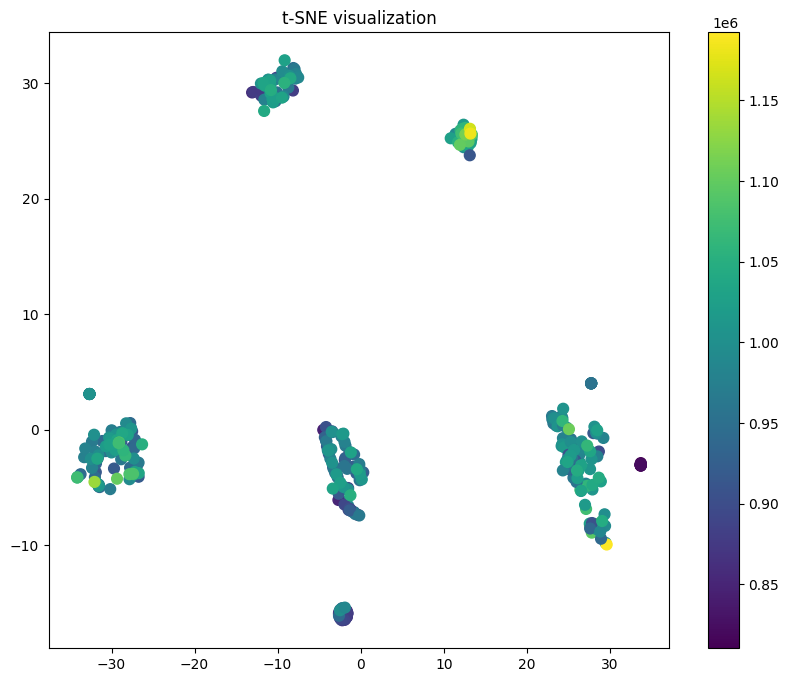

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

labels = df['citizenId']
data = df.drop('citizenId', axis=1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis', s=60)
plt.colorbar()
plt.title('t-SNE visualization')
plt.show()


# t-sne after scale

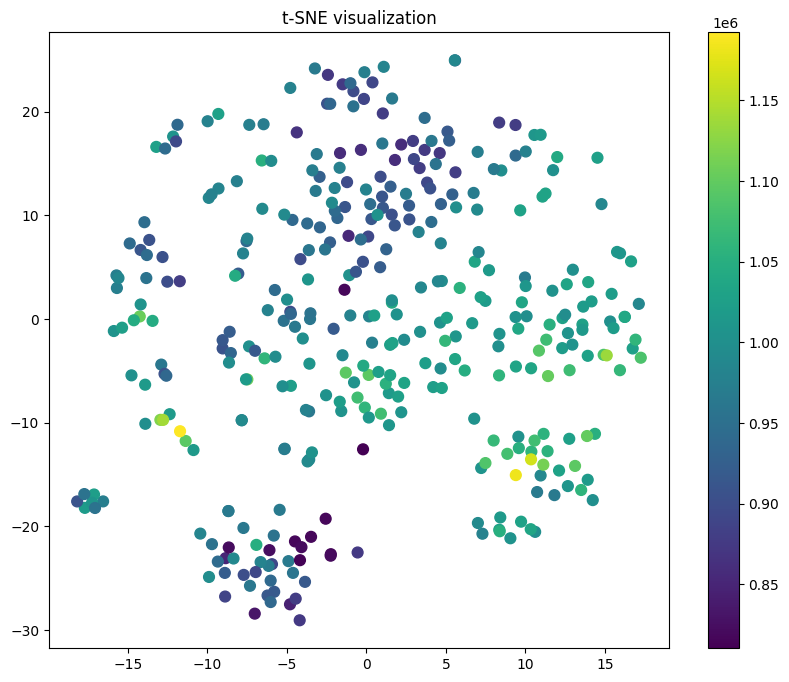

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

labels = df['citizenId']
X = df.drop('citizenId', axis=1)

data = StandardScaler().fit_transform(X)


# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis', s=60)
plt.colorbar()
plt.title('t-SNE visualization')
plt.show()

# KMeans

In [14]:
def cluster_kmeans(n_clusters):
    # Separate 'citizenId'
    ids = df['citizenId']
    X = df.drop('citizenId', axis=1)

    # It's often a good idea to scale the data for KMeans
    X_scaled = StandardScaler().fit_transform(X)

    # Apply KMeans clustering
    # n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X_scaled)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # Apply t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(X_scaled)

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis', s=60)
    plt.colorbar()
    plt.title('KMeans clustering visualized with t-SNE')
    plt.show()

    # Print cluster number and corresponding IDs
    clusters = []
    for cluster_num in range(n_clusters):
        cluster_ids = ids[df['cluster'] == cluster_num].tolist()
        print(f"Cluster {cluster_num}: {cluster_ids}")
        clusters.append(cluster_ids)
    return clusters

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


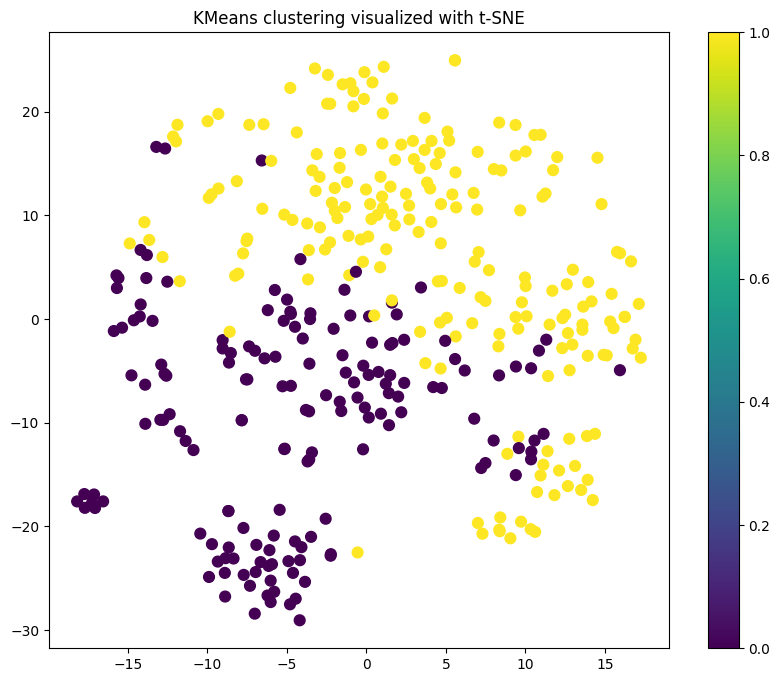

Cluster 0: [955397, 955420, 957973, 964298, 965126, 963240, 965931, 970807, 975775, 978558, 984216, 986539, 992082, 992105, 997234, 999442, 1000224, 1003858, 1003812, 1007055, 1007101, 1008343, 1015680, 1017359, 1021131, 1051353, 1051422, 1055838, 1058943, 1066533, 1074629, 1074514, 1086888, 1094064, 1095398, 1095421, 1104736, 1119847, 1139190, 1166629, 1182085, 1192205, 972900, 912180, 912318, 916274, 915699, 937710, 942632, 943690, 938906, 961676, 965517, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 1010390, 1016899, 1026559, 1022166, 1034356, 1030354, 1050157, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1092017, 1073939, 1106921, 831841, 1019084, 845710, 849206, 873839, 878301, 887892, 892078, 897667, 953856, 942770, 960802, 963401, 961285, 968783, 981801, 987919, 992496, 996130, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1033206, 1041210, 1040313, 1046707, 1022212, 987505, 1010114, 891457, 898196, 899783, 900841, 908638, 914480, 915

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


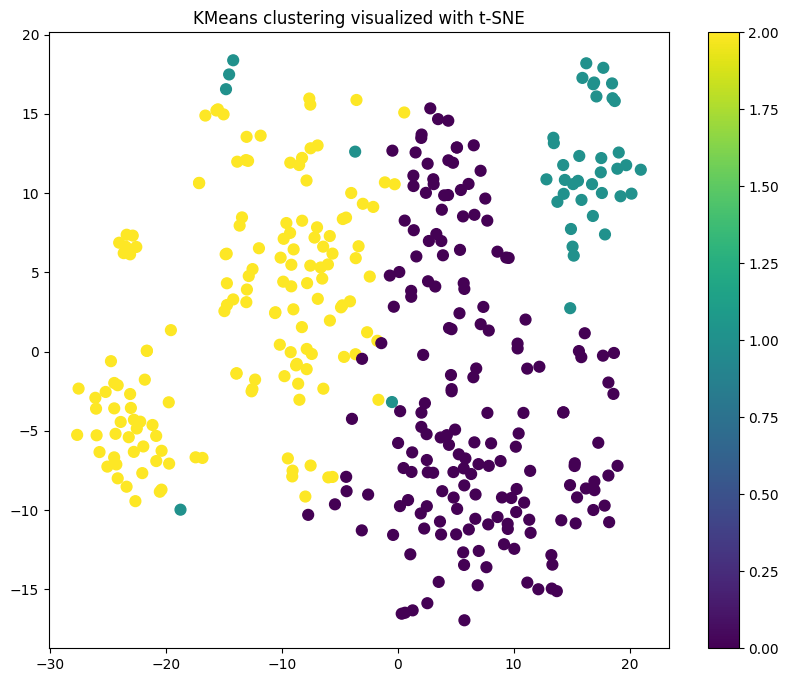

Cluster 0: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 939136, 942701, 942448, 941344, 941988, 920115, 966345, 967932, 969197, 974487, 972348, 974464, 977615, 980145, 980766, 991875, 991415, 991461, 997809, 997464, 999925, 1003582, 1006825, 1006917, 1007124, 1010045, 996636, 1013564, 1017083, 1018348, 1022580, 1025432, 1019337, 1029227, 1029204, 1030883, 1035322, 1034885, 1037208, 1035138, 1060553, 1074123, 1083599, 1102643, 1083484, 1135441, 855048, 858107, 859257, 857509, 860453, 867008, 870481, 875656, 871401, 875311, 878163, 878623, 877956, 879796, 880394, 878692, 878761, 889272, 897207, 892952, 899415, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977592, 977040, 980260, 985941, 984952, 983342, 987068, 987689, 973360, 994520, 995049, 998913, 1000454, 1000109, 1006503, 1006733, 1014990, 1020073, 1021913, 1021085, 1026996, 1026881, 1026743, 1023224, 1031504, 1028928, 1033735, 1041394, 1053768, 891227, 895321, 891940, 897

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


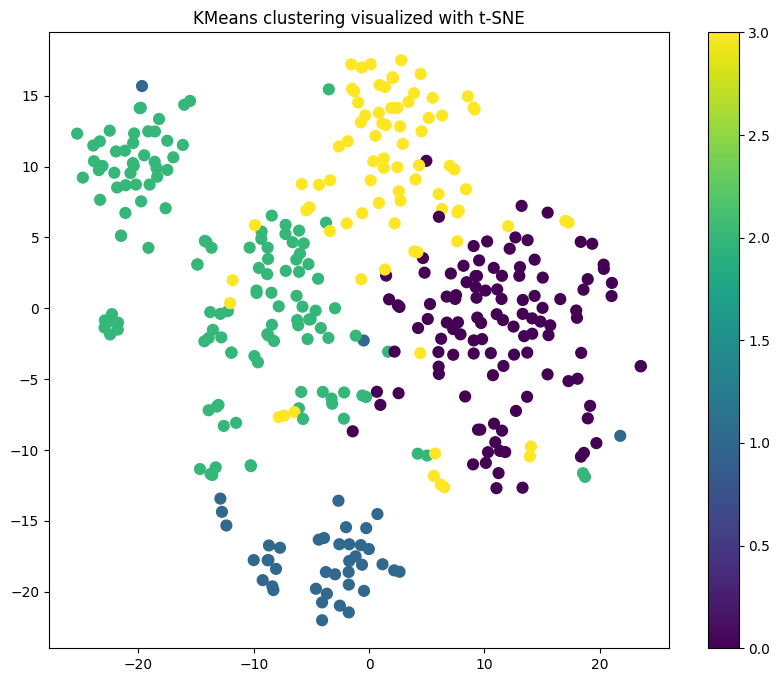

Cluster 0: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 939136, 942701, 942448, 941344, 941988, 920115, 966345, 967932, 969197, 974487, 972348, 974464, 977615, 980145, 980766, 991415, 991461, 997464, 999925, 1006917, 1010045, 855048, 858107, 859257, 857509, 860453, 867008, 870481, 875656, 871401, 875311, 878163, 878623, 877956, 879796, 880394, 878692, 878761, 889272, 897207, 892952, 899415, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977592, 977040, 980260, 985941, 983342, 987689, 973360, 994520, 1026996, 1041394, 891227, 895321, 891940, 897575, 892515, 903141, 905027, 906476, 908661, 912134, 910754, 914457, 915998, 914503, 920575, 924117, 924416, 923956, 926808, 926969, 929867, 934237, 939527, 946588, 945783, 955282, 958341, 961331, 963585, 965632, 966230, 969450, 971520, 969680, 978144, 980697, 982583, 997280, 1002892, 1011149, 1015496, 1030308]
Cluster 1: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


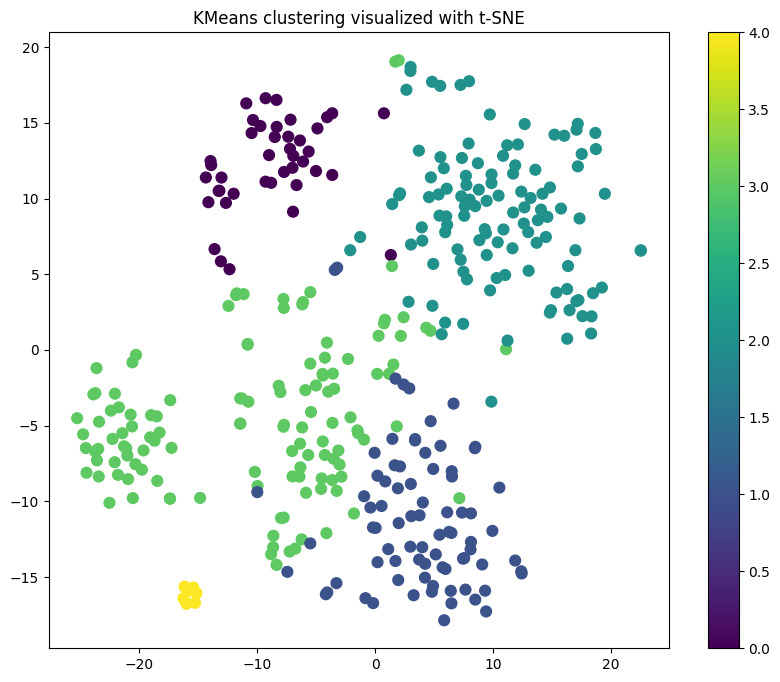

Cluster 0: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1002202, 1003858, 1004663, 1007147, 1008343, 1010022, 1015680, 1015703, 1017290, 1025202, 1026605, 1027433, 1030423, 1030561, 1034333, 1051468, 1051376, 1051422, 1055815, 1055838, 1058943, 1058989, 1066533, 1074514, 1077918, 1086888, 1094064, 1095467, 1101010, 1111981, 1166629, 1182085, 1192205]
Cluster 1: [991875, 997809, 1003582, 1006825, 1007124, 996636, 1013564, 1017083, 1018348, 1022580, 1025432, 1022166, 1019337, 1029227, 1029204, 1030883, 1034356, 1035322, 1034885, 1037208, 1035138, 1030354, 1060553, 1074123, 1058092, 1083599, 1092017, 1073939, 1102643, 1083484, 1135441, 984952, 987068, 995049, 998913, 1000454, 1000109, 1006503, 1006710, 1006733, 1014990, 1020073, 1021913, 1021085, 1026881, 1026743, 1023224, 1031504, 1028928, 1033735, 1033206, 1041210, 1053768, 921909, 976856, 980743, 991645, 987850, 995946, 996176, 999212, 1000385, 1003973, 1005583, 1008458, 1011103, 1011011, 1010827, 1017566, 1017842, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


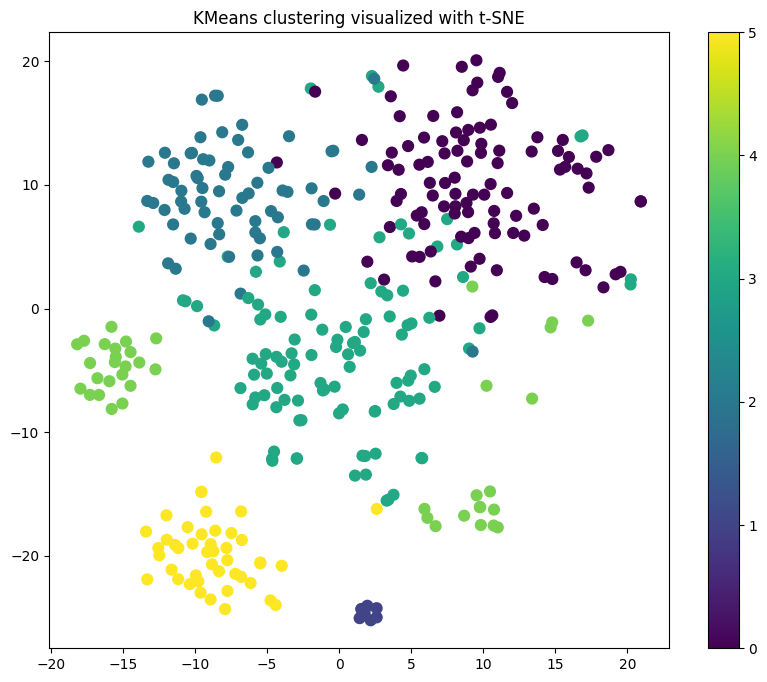

Cluster 0: [905073, 906430, 912157, 921863, 925635, 940930, 939090, 939136, 942701, 941344, 941988, 920115, 966345, 967932, 969197, 974487, 972348, 974464, 977615, 980145, 980766, 991415, 991461, 997464, 999925, 1006917, 1010045, 855048, 858107, 859257, 857509, 860453, 867008, 870481, 875656, 871401, 875311, 878163, 878623, 877956, 879796, 880394, 878692, 878761, 889272, 897207, 892952, 899415, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977040, 980260, 985941, 987689, 973360, 994520, 1026996, 1041394, 891227, 895321, 891940, 897575, 892515, 903141, 905027, 908661, 912134, 910754, 914457, 915998, 920575, 924117, 923956, 926808, 926969, 929867, 939527, 946588, 945783, 955282, 961331, 963585, 965632, 966230, 969450, 971520, 969680, 978144, 980697, 982583, 997280, 1002892, 1011149, 1015496, 1030308]
Cluster 1: [972900, 1019084, 1022212, 1010114, 909811, 955098, 955121]
Cluster 2: [991875, 997809, 1003582, 1006825, 1007124, 1013564, 1017083, 1018348, 1022580, 1025432, 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


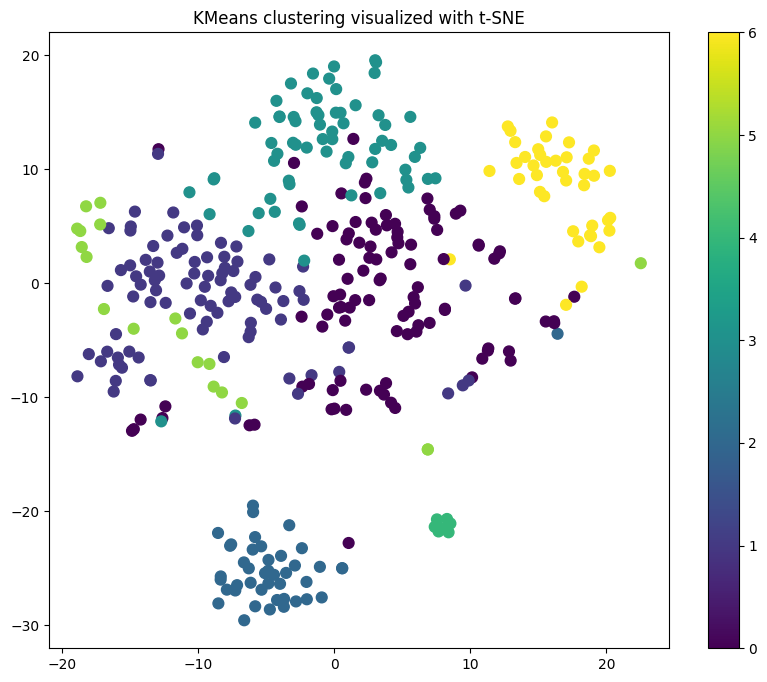

Cluster 0: [957973, 964298, 965126, 963240, 970807, 975775, 978558, 986539, 992082, 992105, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1094064, 1095398, 1095421, 1104736, 1119847, 1139190, 912180, 912318, 942632, 943690, 961676, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 996636, 1010390, 1016899, 1026559, 1022166, 1030354, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1106921, 897667, 953856, 960802, 977592, 984952, 992496, 1000454, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1041210, 1040313, 1046707, 1053768, 898196, 899783, 908638, 914480, 915630, 917815, 907005, 921909, 935640, 936238, 938055, 955236, 955857, 978581, 943966, 987160, 995647, 996176, 997372, 999212, 1000132, 1003973, 1008458, 1013794, 1018325, 1024512, 1023707, 1031044, 1016554, 1033781, 1045350, 1043947, 810359]
Cluster 1: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 942701, 942448, 94134

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


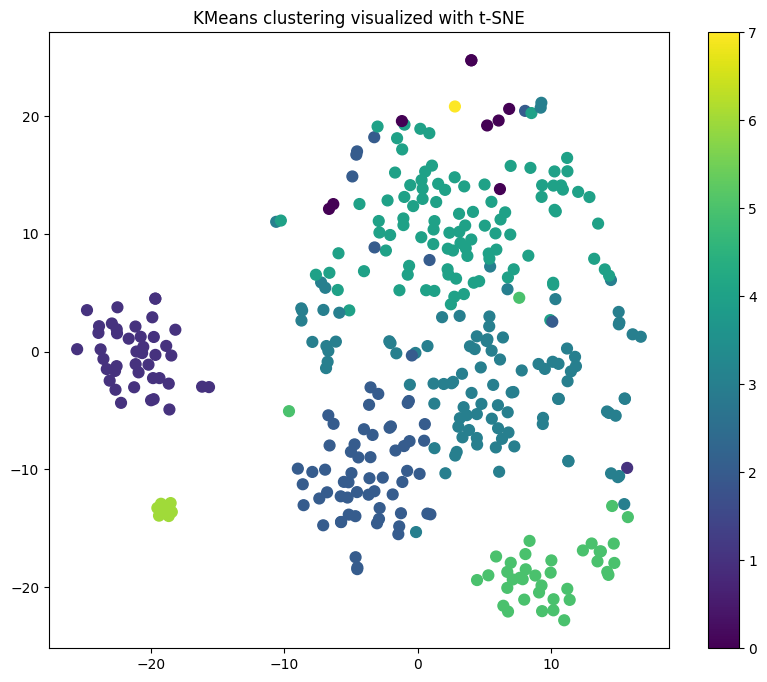

Cluster 0: [939136, 920115, 966345, 969197, 974464, 980145, 987689, 1026996, 1015496]
Cluster 1: [955397, 955420, 965931, 984216, 997234, 916274, 915699, 937710, 938906, 965517, 1050157, 831841, 845710, 849206, 873839, 878301, 873908, 887892, 892078, 942770, 963401, 961285, 968783, 981801, 987919, 996130, 987505, 891457, 900841, 915193, 920828, 958847, 964827, 811969, 816592, 816753, 816822, 816914, 816799, 820065, 821951, 823607, 821261]
Cluster 2: [967932, 991875, 997809, 999925, 1003582, 1006825, 1006917, 1007124, 1013564, 1017083, 1018348, 1022580, 1025432, 1019337, 1029227, 1029204, 1030883, 1034356, 1035322, 1034885, 1037208, 1035138, 1060553, 1074123, 1083599, 1092017, 1073939, 1102643, 1083484, 1135441, 985941, 987068, 995049, 998913, 1000109, 1006503, 1006733, 1014990, 1020073, 1021913, 1021085, 1026881, 1026743, 1023224, 1031504, 1028928, 1033735, 1033206, 980743, 991645, 987850, 995946, 1000385, 1005583, 1011103, 1011011, 1010827, 1017566, 1017842, 1025294, 1030308, 1032240,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


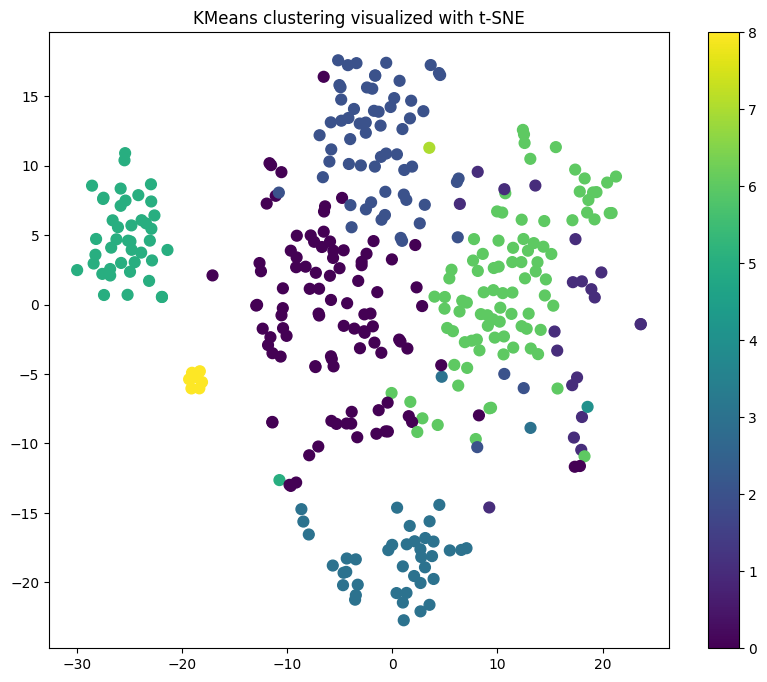

Cluster 0: [957973, 964298, 965126, 963240, 970807, 975775, 978558, 986539, 992082, 992105, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1074629, 1095398, 1095421, 1104736, 1119847, 1139190, 912180, 912318, 942632, 943690, 961676, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 996636, 1010390, 1016899, 1026559, 1022166, 1030354, 1059702, 1060461, 1065406, 1054044, 1075342, 1106921, 897667, 953856, 960802, 977592, 992496, 1000454, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1041210, 1040313, 1046707, 1053768, 898196, 899783, 908638, 914480, 915630, 917815, 907005, 921909, 935640, 936238, 938055, 955236, 955857, 978581, 943966, 987160, 995647, 996176, 997372, 999212, 1000132, 1003973, 1008458, 1013794, 1018325, 1024512, 1023707, 1031044, 1016554, 1033781, 1045350, 1043947, 810359]
Cluster 1: [1025202, 939136, 920115, 966345, 969197, 974464, 980145, 999925, 1006917, 857509, 867008, 878623, 877956, 878692, 977040, 987689, 1041394, 10111

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


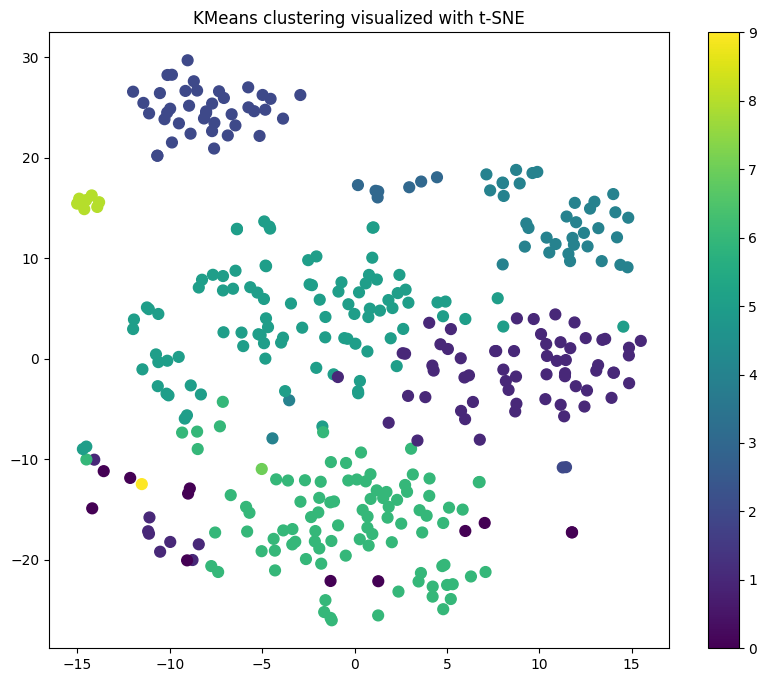

Cluster 0: [1025202, 939136, 920115, 966345, 969197, 974464, 980145, 857509, 867008, 878692, 987689, 1015496]
Cluster 1: [967932, 997809, 999925, 1003582, 1006825, 1006917, 1007124, 1013564, 1017083, 1018348, 1022580, 1025432, 1019337, 1029227, 1029204, 1030883, 1034356, 1035322, 1034885, 1037208, 1035138, 1060553, 1074123, 1083599, 1092017, 1073939, 1102643, 1083484, 1135441, 977040, 985941, 987068, 995049, 998913, 1000109, 1006503, 1006733, 1014990, 1020073, 1021913, 1021085, 1026881, 1026743, 1023224, 1031504, 1028928, 1033735, 1033206, 1041394, 980743, 991645, 987850, 995946, 1000385, 1005583, 1011103, 1011149, 1011011, 1010827, 1017566, 1017842, 1025294, 1030308, 1032240, 1034195, 1040014, 1043694, 1051445, 1063497]
Cluster 2: [955397, 955420, 965931, 984216, 916274, 915699, 937710, 938906, 965517, 1050157, 831841, 845710, 849206, 873839, 878301, 873908, 887892, 892078, 942770, 963401, 961285, 968783, 981801, 987919, 996130, 987505, 891457, 900841, 915193, 920828, 958847, 964827, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


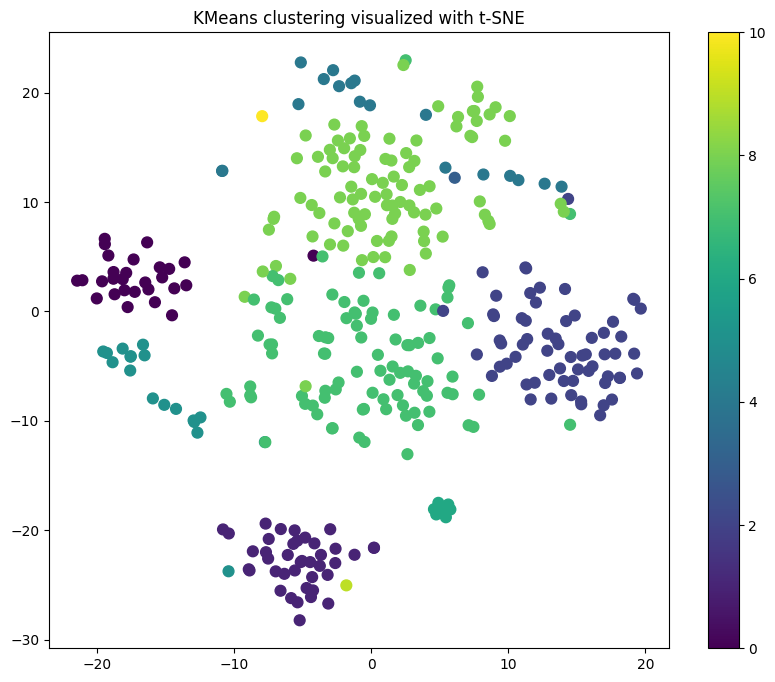

Cluster 0: [965954, 966092, 986953, 986562, 999419, 1002202, 1003858, 1004663, 1008343, 1010022, 1017290, 1026605, 1030561, 1051468, 1051422, 1055815, 1055838, 1058943, 1058989, 1066533, 1074514, 1077918, 1086888, 1095467, 1101010, 1111981, 1166629, 1182085]
Cluster 1: [955397, 955420, 965931, 984216, 916274, 915699, 937710, 938906, 965517, 1050157, 831841, 845710, 849206, 873839, 878301, 892078, 942770, 963401, 961285, 968783, 981801, 987919, 996130, 987505, 891457, 900841, 915193, 920828, 958847, 964827, 811969, 816592, 816753, 816822, 816914, 816799, 820065, 821951, 823607, 821261]
Cluster 2: [967932, 997809, 1003582, 1006825, 1006917, 1007124, 1013564, 1017083, 1018348, 1022580, 1025432, 1019337, 1029227, 1029204, 1030883, 1034356, 1035322, 1034885, 1037208, 1035138, 1060553, 1074123, 1083599, 1092017, 1073939, 1102643, 1083484, 1135441, 985941, 987068, 995049, 998913, 1000109, 1006503, 1006733, 1014990, 1020073, 1021913, 1021085, 1026881, 1026743, 1023224, 1031504, 1028928, 103373

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


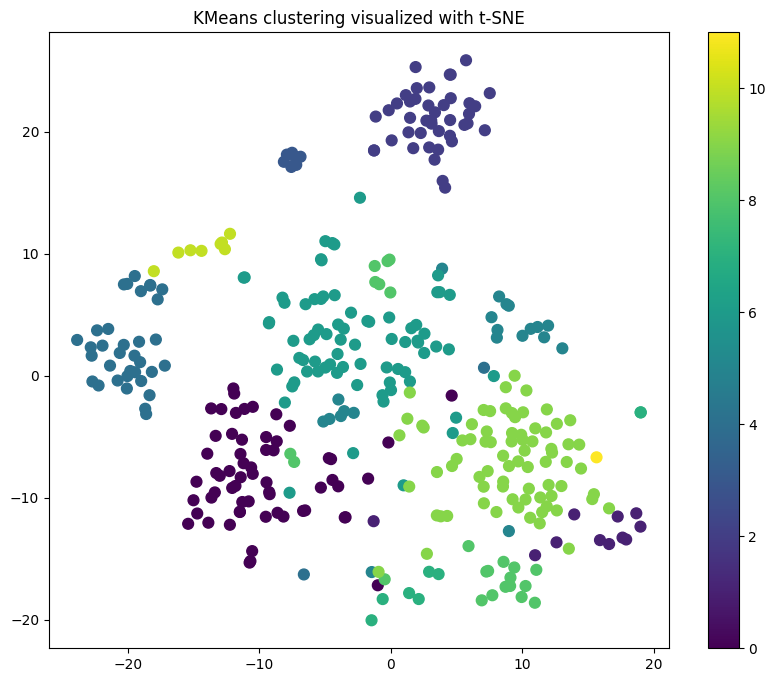

Cluster 0: [967932, 997809, 1003582, 1006917, 1007124, 1013564, 1017083, 1018348, 1022580, 1025432, 1019337, 1029227, 1029204, 1030883, 1034356, 1035322, 1034885, 1037208, 1035138, 1060553, 1074123, 1083599, 1092017, 1073939, 1102643, 1083484, 1135441, 985941, 987068, 995049, 1000109, 1006503, 1006733, 1014990, 1020073, 1021913, 1021085, 1026881, 1026743, 1023224, 1031504, 1028928, 1033735, 1033206, 980743, 991645, 987850, 995946, 1000385, 1005583, 1011103, 1011011, 1010827, 1017566, 1017842, 1032240, 1034195, 1040014, 1043694, 1051445, 1063497]
Cluster 1: [999925, 867008, 878623, 877956, 878692, 977040, 1041394, 971520, 1011149, 1015496, 1030308]
Cluster 2: [955397, 955420, 965931, 984216, 916274, 915699, 937710, 938906, 965517, 1050157, 831841, 845710, 849206, 873839, 878301, 873908, 887892, 892078, 942770, 963401, 961285, 968783, 981801, 987919, 996130, 987505, 891457, 900841, 915193, 920828, 958847, 964827, 811969, 816592, 816753, 816822, 816914, 816799, 820065, 821951, 823607, 821

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


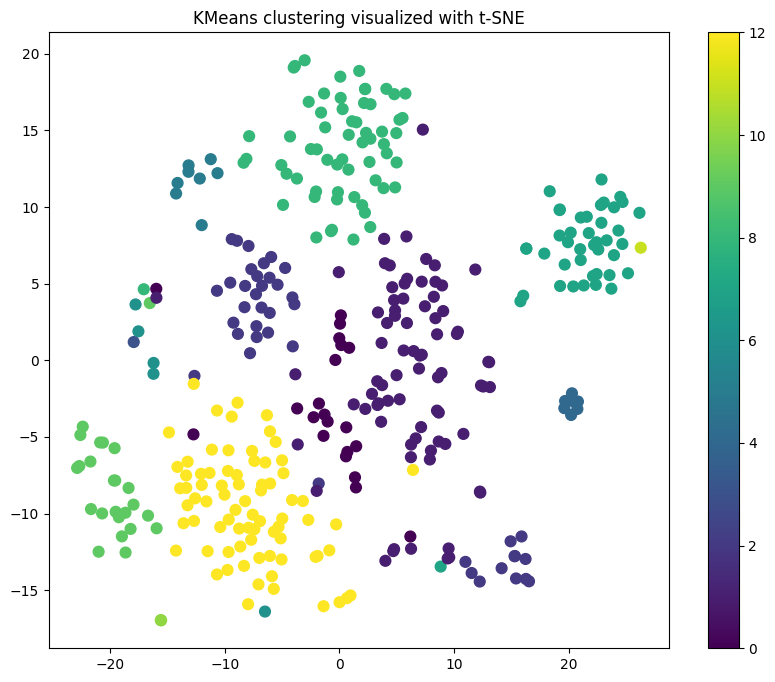

Cluster 0: [1104736, 905257, 906430, 912318, 942448, 943690, 972739, 973130, 986194, 1006112, 880394, 945254, 1006710, 1026490, 899783, 945783, 955236, 1000132, 1023707, 1045350, 1043947]
Cluster 1: [957973, 964298, 965126, 963240, 970807, 975775, 978558, 986539, 992082, 992105, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1074629, 1095398, 1095421, 1119847, 1139190, 912180, 942632, 961676, 997786, 1004502, 996636, 1010390, 1016899, 1026559, 1022166, 1030354, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1106921, 897667, 953856, 960802, 992496, 1000454, 989322, 1009355, 1022235, 1024351, 1033367, 1040313, 1046707, 1053768, 898196, 908638, 914480, 915630, 917815, 907005, 935640, 936238, 938055, 955857, 978581, 943966, 987160, 995647, 996176, 997372, 1008458, 1013794, 1018325, 1024512, 1031044, 1016554, 1033781, 810359]
Cluster 2: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1002202, 1003858, 1004663, 1007147, 1008343, 1010022, 1015680, 101570

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


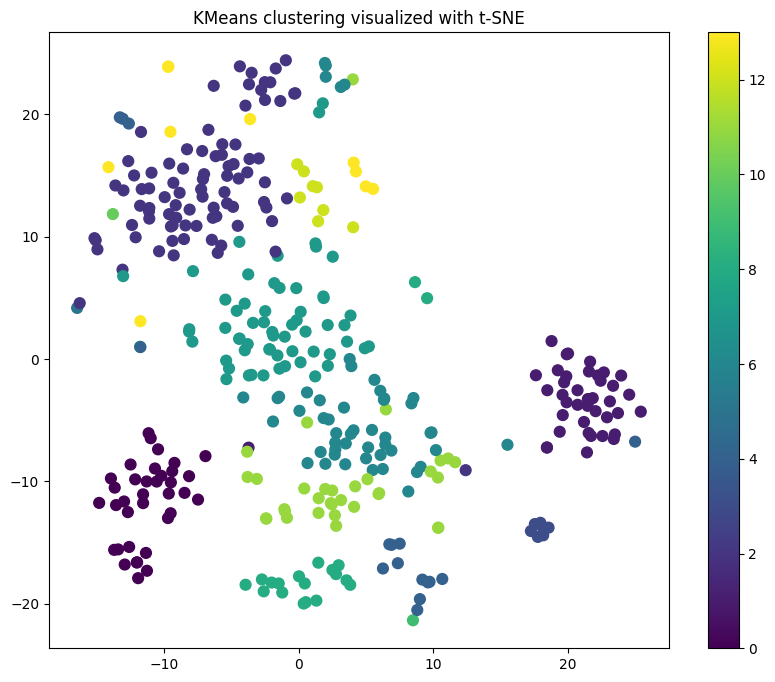

Cluster 0: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1003858, 1004663, 1007147, 1008343, 1010022, 1015703, 1017290, 1026605, 1027433, 1030423, 1030561, 1034333, 1051468, 1051376, 1051422, 1055815, 1055838, 1058943, 1058989, 1066533, 1074514, 1077918, 1086888, 1095467, 1101010, 1111981, 1166629, 1182085]
Cluster 1: [955397, 955420, 965931, 984216, 916274, 915699, 937710, 938906, 965517, 1050157, 831841, 845710, 849206, 878301, 873908, 887892, 892078, 942770, 963401, 961285, 968783, 981801, 987919, 996130, 987505, 891457, 900841, 915193, 920828, 958847, 964827, 811969, 816592, 816753, 816822, 816914, 820065, 821951, 823607, 821261]
Cluster 2: [905073, 912157, 919632, 925635, 934651, 934605, 940930, 939090, 942701, 941344, 941988, 974487, 972348, 977615, 980766, 991415, 991461, 997464, 1010045, 855048, 858107, 859257, 857509, 860453, 870481, 875656, 871401, 875311, 878163, 879796, 878761, 889272, 897207, 892952, 899415, 945277, 946933, 960434, 952614, 965701, 965977

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


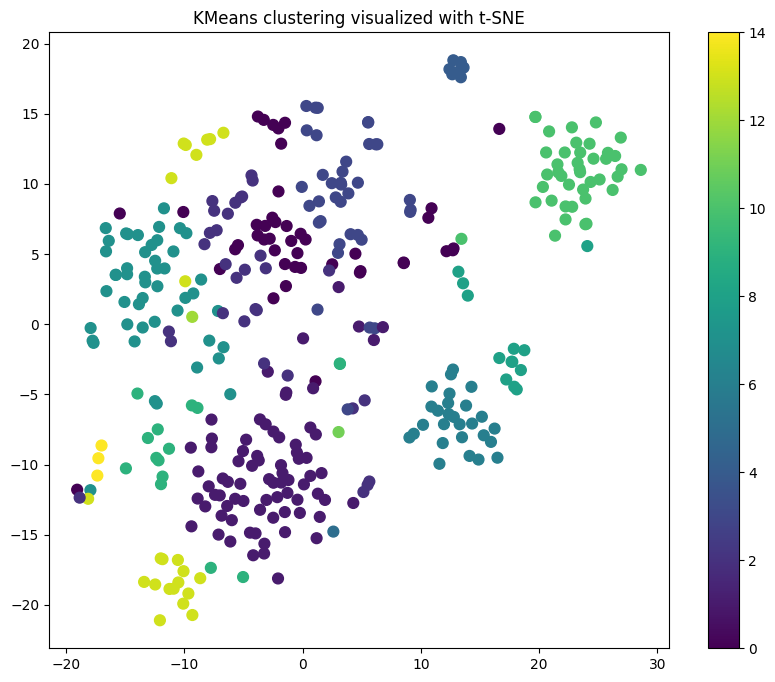

Cluster 0: [957973, 992082, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1095398, 1095421, 1104736, 1119847, 1139190, 1006112, 1010390, 1016899, 1026559, 1022166, 1030354, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1106921, 1009355, 1006710, 1024351, 1026490, 1033367, 1046707, 987160, 995647, 1000132, 1008458, 1013794, 1018325, 1023707, 1016554, 1033781, 1045350, 1043947, 810359]
Cluster 1: [905073, 905257, 906430, 912157, 919632, 925635, 934651, 934605, 940930, 939090, 942701, 942448, 941344, 941988, 974487, 972348, 977615, 980766, 991415, 991461, 997464, 1010045, 855048, 858107, 859257, 857509, 860453, 875656, 871401, 878163, 879796, 880394, 878761, 897207, 892952, 899415, 945277, 945254, 946933, 960434, 965701, 965977, 974694, 980260, 994520, 891227, 892515, 903141, 905027, 908661, 912134, 910754, 914457, 915998, 914503, 920575, 924117, 921909, 924416, 923956, 926808, 926969, 929867, 946588, 945783, 955282, 958341, 961331, 963585, 969450, 971520, 969680, 980697, 

In [11]:
cluser_results = {}

for i in range(2, 16):
    n_cluser = i
    print(n_cluser)
    cluser_results[i] = cluster_kmeans(i)

In [12]:
len(cluser_results.items())

14

# save cluster into files for 5 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


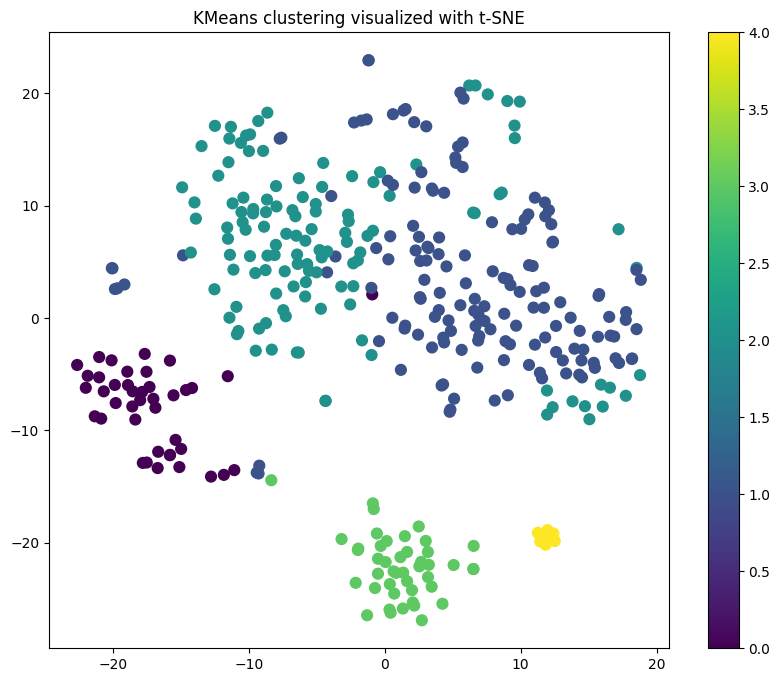

Cluster 0: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1002202, 1003858, 1004663, 1007147, 1008343, 1010022, 1015680, 1015703, 1017290, 1025202, 1026605, 1027433, 1030423, 1030561, 1034333, 1051468, 1051376, 1051422, 1055815, 1055838, 1058943, 1058989, 1066533, 1074514, 1077918, 1086888, 1094064, 1095467, 1101010, 1111981, 1166629, 1182085, 1192205]
Cluster 1: [957973, 964298, 965126, 963240, 970807, 975775, 978558, 986539, 992082, 992105, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1095398, 1095421, 1104736, 1119847, 1139190, 912180, 912318, 934605, 942632, 943690, 961676, 979984, 972739, 973130, 986194, 997786, 997809, 1003582, 1004502, 1006112, 1006825, 1007124, 996636, 1010390, 1016899, 1017083, 1018348, 1022580, 1025432, 1026559, 1022166, 1019337, 1029227, 1029204, 1030883, 1034356, 1035322, 1037208, 1030354, 1059702, 1060461, 1065406, 1054044, 1060553, 1074123, 1075342, 1058092, 1083599, 1092017, 1073939, 1102643, 1083484, 

In [18]:
cluser_5_results = cluster_kmeans(5)

In [20]:
cluser_5_results[0]

[965954,
 966092,
 978420,
 986953,
 986562,
 990863,
 999419,
 999580,
 1002202,
 1003858,
 1004663,
 1007147,
 1008343,
 1010022,
 1015680,
 1015703,
 1017290,
 1025202,
 1026605,
 1027433,
 1030423,
 1030561,
 1034333,
 1051468,
 1051376,
 1051422,
 1055815,
 1055838,
 1058943,
 1058989,
 1066533,
 1074514,
 1077918,
 1086888,
 1094064,
 1095467,
 1101010,
 1111981,
 1166629,
 1182085,
 1192205]

In [30]:
def save_cluster(cluster_id, df, citizid_list):
    # Select rows where citizenId is in citizid_list
    selected_rows = df[df['citizenId'].isin(citizid_list)]


    output_path = os.path.join(output_dir,f'cluster_{cluster_id}.csv')
    print(output_path)

    # print(selected_rows)
    # Save the selected rows to a CSV file
    selected_rows.to_csv(output_path, index=False)

In [31]:
for i, v in enumerate(cluser_5_results):
    save_cluster(i+1, df, v)

/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_1.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_2.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_3.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_4.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_5.csv
